In [1]:
%pylab inline

import numpy as np
from sympy import*

init_printing(use_unicode=True)  # Print sympy's returned values

Populating the interactive namespace from numpy and matplotlib


The Binding Model
=================

The binding model may be represented by the following graph

$$P+L \; \underset{K_{D}^{'}}{\rightleftharpoons} \; P \bullet L \; \underset{K_{D}^{''}}{\rightleftharpoons} \; P \bullet L \bullet P$$

Equilibrium Dissociation Constants
----------------------------------

Considering $K_{D}$ as a general measure of affinity between $P$ and the dually-functional $L$, the equilibrium dissociation constants for each of the steps in the model, $K_{D}^{'}$ and $K_{D}^{''}$, can be considered to be a scalar function of $K_{D}$. We'll represent this in the following expressions.

$$K_{D}^{'} = \frac{1}{2}K_{D}$$

$$K_{D}^{''} = \frac{2}{\alpha}K_{D}$$

In the above expressions you should note the accounting for statistical effects given the multiplicity of binding sites on the ligand; there are two ways for $P$ to join to $L$ in the first step and only one way for $P \bullet L$ to disassociate, while there is only one way for $P$ to join to $P \bullet L$ and two ways for $P \bullet L \bullet P$ to disassociate. Additionally, $\alpha$ is an expression of the degree of cooperativity in binding which may represent negative cooperativity *(0, 1)*, non-cooperativity *[1]*, and positive cooperativity *(1, $\infty$)*.

Since these are equilibrium dissocation constants they may also be expressed as the ratios of reactants over products:

$$K_{D}^{'} = \frac{1}{2}K_{D} = \frac{[P][L]}{[P \bullet L]}$$

$$K_{D}^{''} = \frac{2}{\alpha}K_{D} \frac{[P][P \bullet L]}{[P \bullet L \bullet P]}$$

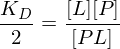

In [2]:
#Kd-prime and Kd-doubleprime as expressions of Kd and alpha (cooperativity)
#as well as their concentration ratios
kd, alpha, p, l, pl, plp = symbols('K_{D} alpha [P] [L] [PL] [PLP]')

kd_p = Eq(kd / 2, p * l / pl)

kd_p

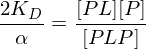

In [3]:
kd_pp = Eq(2 * kd / alpha, p * pl / plp)
kd_pp

Mass Balance
------------

The following equations account for the distribution of the total ligand and total protein between the different species:

$$[L]_{T} = [L] + [P \bullet L] + [P \bullet L \bullet P]$$

$$[P]_{T} = [P] + [P \bullet L] + 2[P \bullet L \bullet P]$$

In [4]:
l_t, p_t = symbols('[L]_{T} [P]_{T}')

#Represent L_total
l_total = Eq(l_t, l + pl + plp)
l_total

In [5]:
#Represent P_total
p_total = Eq(p_t, p + pl + 2 * plp)
p_total

The mass balance equations may be combined with the equilibrium dissociation equations into a cubic form. Isolating $[P \bullet L]$ and $[P \bullet L \bullet P]$ from their equations yields:

$$[P \bullet L] = 2 \frac{[L] [P]}{K_{{D}}}$$

$$[P \bullet L \bullet P] = \frac{[P \bullet L] [P] \alpha}{2 K_{{D}}}$$

Substituting the former into the latter yields:

$$[P \bullet L \bullet P] = \frac{[L] [P]^{2} \alpha}{K_{{D}}^{2}}$$

Which then allows us to express the free ligand concentration, $[L]$, in terms of $[L]_{T}$, $K_{D}$, $\alpha$, and $[P]$. Which is as follows:

$$[L] = \frac{K_{{D}}^{2} [L]_{{T}}}{K_{{D}}^{2} + 2 K_{{D}} [P] + [P]^{2} \alpha}$$

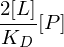

In [6]:
#Isolate PL from Kd'
isol_pl = solvers.solve(kd_p, pl)[0]

#Isolate PLP from Kd''
isol_plp = solvers.solve(kd_pp, plp)[0]

#Replace isolated PLP expression with new form using substituted isolated PL
isol_plp = isol_plp.subs(pl, isol_pl)

#Show isolated PL expresson
isol_pl

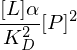

In [7]:
#Show isolated PLP expression
isol_plp

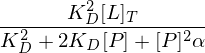

In [8]:
#Substitute these expressions into L_total
subs_l_total = l_total.subs(plp, isol_plp)
subs_l_total = subs_l_total.subs(pl, isol_pl)

#Solve for L
l_free = solvers.solve(subs_l_total, l)[0]
#Show L_free
l_free

In this fashion we can derive an expression for the total protein concentration, $[P]_{T}$, in terms of $[P]$, $K_{D}$, $\alpha$, and $[L]$. Which is as follows:

$$[P]_{{T}} = [P] + 2 \frac{[L] [P]}{K_{{D}}} + 2 \frac{[L] [P]^{2} \alpha}{K_{{D}}^{2}}$$

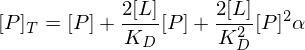

In [9]:
#Substitute the isolated PL/PLP expressions into P_total
subs_p_total = p_total.subs(plp, isol_plp)
subs_p_total = subs_p_total.subs(pl, isol_pl)

#Show P_total
subs_p_total

By substituting the expression for free ligand concentration into our formula for total protein concentration, we can derive an expression for $[P]_{T}$ that depends instead on $[P]$, $K_{D}$, $\alpha$, and $[L]_{T}$ which is:

$$[P]_{{T}} = 2 \frac{K_{{D}} [L]_{{T}} [P]}{K_{{D}}^{2} + 2 K_{{D}} [P] + [P]^{2} \alpha} + 2 \frac{[L]_{{T}} [P]^{2} \alpha}{K_{{D}}^{2} + 2 K_{{D}} [P] + [P]^{2} \alpha} + [P]$$

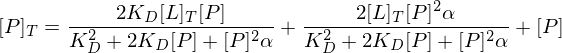

In [10]:
#Substitute in our l_free expression into sub_p_total to replace dependence on [L] with [L]_total
subs_p_total = subs_p_total.subs(l, l_free)

#Show subs_p_total
subs_p_total

Rearrange P_Total to cubic form
-------------------------------

This equation for $[P]_{T}$ may be rearranged into a cubic function for $[P]$. The general form of this cubic function is:

$$[P]^{3} + a[P]^{2} + b[P] + c = 0$$

Refer to the sympy code below for the rearrangement process... The result is:

$$[P]^{3} + \frac{\left(2 K_{{D}} + 2 [L]_{{T}} \alpha - [P]_{{T}} \alpha\right)}{\alpha}[P]^{2} + \frac{\left(K_{{D}}^{2} + 2 K_{{D}} [L]_{{T}} - 2 K_{{D}} [P]_{{T}}\right)}{\alpha}[P] - \frac{K_{{D}}^{2} [P]_{{T}}}{\alpha} = 0$$

Where our coefficients $a$, $b$, and $c$ are:

$$a = \frac{\left(2 K_{{D}} + 2 [L]_{{T}} \alpha - [P]_{{T}} \alpha\right)}{\alpha}$$
$$b = \frac{\left(K_{{D}}^{2} + 2 K_{{D}} [L]_{{T}} - 2 K_{{D}} [P]_{{T}}\right)}{\alpha}$$
$$c = \frac{K_{{D}}^{2} [P]_{{T}}}{\alpha}$$

In [11]:
#Rearrange P_total to the other side then expand
p_expression = solvers.solve(subs_p_total, p_t)[0] - p_t
p_expression = p_expression.expand()

#Multiply the expression by the proper value to obtain [P]^(3) with coefficient of alpha
p_expression = p_expression * (kd ** 2 + 2 * kd * p + p ** 2 * alpha)

#Cancel through and show p_expression
p_expression = cancel(p_expression)
p_expression

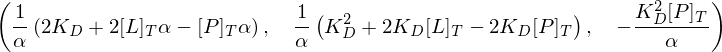

In [12]:
#Collect the terms of the polynomial with the same power of [P]
power_coeffs = collect(p_expression, p, evaluate=False)

#Normalize for coefficientless [P]**3 by dividing all terms by alpha and assign/display
a, b, c = symbols('a b c')
a = power_coeffs[p**2] / alpha
b = power_coeffs[p**1] / alpha
c = power_coeffs[p**0] / alpha

a, b, c

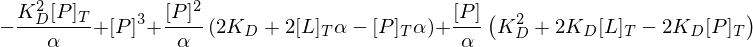

In [13]:
#Using these coefficients, compose our new cubic function
cubic_p_expression = p ** 3 + a * p **2 + b * p + c
cubic_p_expression
#For the latex representation in the markdown, I simply rearranged this equation into
#power order and clarified this by placing [P]**n beside the fraction

There exists only one real solution to a cubic function, whose value would represent the appropiate value of $[P]$ given the equilibrium system's specific traits of $K_{D}$, $\alpha$, $[L]_{T}$, and $[P]_{T}$. The solution takes the following form:

\begin{align}[P] &= -\frac{a}{3} + \sqrt[3]{R + \sqrt{Q^{3} + R^{2}}} + \sqrt[3]{R - \sqrt{Q^{3} + R^{2}}} \\
Q &= \frac{3b - a^{2}}{9} \\
R &= \frac{9ab - 27c -2a^{3}}{54}
\end{align}

Expressions for $[P \bullet L]$ and $[P \bullet L \bullet P]$ which are functions solely of $K_{D}$, $\alpha$, $[L]_{T}$, and $[P]$, we can begin by substituting our equation for free ligand,

$$[L] = \frac{K_{{D}}^{2} [L]_{{T}}}{K_{{D}}^{2} + 2 K_{{D}} [P] + [P]^{2} \alpha}$$

into the equations for $[P \bullet L]$ and $[P \bullet L \bullet P]$ isolated from the equilibrium dissociaton constant equations to yield:

$$[a \bullet L] = 2 \frac{K_{{D}} [L]_{{T}} [P]}{K_{{D}}^{2} + 2 K_{{D}} [P] + [P]^{2} \alpha}$$

and

$$[P \bullet L \bullet P] = \frac{[L]_{{T}} [P]^{2} \alpha}{K_{{D}}^{2} + 2 K_{{D}} [P] + [P]^{2} \alpha}$$

Having already derived a means of solving for [P] as a function of $K_{D}$, $\alpha$, and $[L]_{T}$, it is simple to solve for these species in addition.

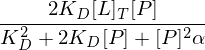

In [14]:
pl_expr = isol_pl.subs(l, l_free)
pl_expr

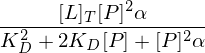

In [15]:
plp_expr = isol_plp.subs(l, l_free)
plp_expr

Putting the model to work
-------------------------

Now we'll have a demonstration putting this work together into a predictive model. In an experimental setting, the researcher will not know the values of $K_{D}$ and $\alpha$ from the beginning but must instead fit their data according to the model and find the values that best explain their observations.

In [16]:
#First we need to be able to calculate our cubic polynomial constants
def calc_abc(kd, alpha, p_total, l_total):
    a = 2.0 * kd / alpha + 2.0 * l_total - p_total
    b = (np.power(kd, 2.0) + 2.0 * kd * l_total - 2.0 * kd * p_total) / alpha
    c = -1 * (np.power(kd, 2.0) * p_total) / alpha
    return a, b, c

#Secondly we need to calculate the Q and R for the cubic solution
def calc_qr(a, b, c):
    q = (3 * b - np.power(a, 2)) / 9
    r = (9 * a * b - 27 * c - 2.0 * np.power(a, 3)) / 54
    return q, r

#Thirdly we need to be able to solve the cubic formula in either cartesian or polar coords
def cartesian_cubic(a, q, r):  # For use if Q^3+R^2 > 0
    first = -1 * a / 3.0
    second = np.power(r + np.power(np.power(q, 3.0) + np.power(r, 2.0), 0.5), 1.0 / 3.0)
    third = np.power(r - np.power(np.power(q, 3.0) + np.power(r, 2.0), 0.5), 1.0 / 3.0)
    return first + second + third

def polar_cubic(a, q, r):  # For use if Q^3+R^2 < 0
    theta =  np.arccos(r / np.power(-1 * np.power(q, 3), 0.5))
    return np.cos(theta / 3.0) * np.power(-1 * q, 0.5) * 2.0 - (a / 3.0)

#If we wish to plot [PL] and [PLP] as well, we need these
def get_pl(kd, alpha, l_total, p):
    numerator = 2.0 * kd * l_total * p
    denominator = np.power(kd, 2.0) + 2.0 * kd * p + alpha * np.power(p, 2.0)
    return numerator / denominator

def get_plp(kd, alpha, l_total, p):
    numerator = alpha * l_total * np.power(p, 2.0)
    denominator = np.power(kd, 2.0) + 2.0 * kd * p + alpha * np.power(p, 2.0)
    return numerator / denominator

In [17]:
def model_func(kd, alpha, p_total, l_total):
    a, b, c = calc_abc(kd, alpha, p_total, l_total)
    q, r = calc_qr(a, b, c)
    p = []
    for a_val, q_val, r_val in zip(a, q, r):
        if np.power(q_val, 3) + np.power(r_val, 2) > 0:
            p.append(cartesian_cubic(a_val, q_val, r_val))
        else:
            p.append(polar_cubic(a_val, q_val, r_val))
    p = np.array(p)
    pl = get_pl(kd, alpha, l_total, p)
    plp = get_plp(kd, alpha, l_total, p)
    return p, pl, plp

In [1]:
#Create the plot
plot = pylab.figure().add_subplot(111)

total_protein = 0.1

lig_range = 0.00001 * np.power(10, linspace(1, 8, 150))
p, pl, plp = model_func(0.02, 10.0, total_protein, lig_range)

plot.plot(lig_range, p / total_protein, label='[P]')
plot.plot(lig_range, pl / total_protein, label='[PL]')
plot.plot(lig_range, plp / total_protein, label='[PLP]')
plot.set_ylabel('[P]')
plot.set_xscale('log')
plot.set_xlabel(r'Ligand (uM)')
plot.legend(loc='center right')
plot.grid()


NameError: name 'pylab' is not defined

This work is based on **Exact Analysis of Ligand-Induced Dimerization of Monomeric Receptors
Eric T. Mack, Raquel Perez-Castillejos, Zhigang Suo, and George M. Whitesides
*Analytical Chemistry* 2008 *80* (14), 5550-5555** http://dx.doi.org/10.1021%2Fac800578w